In [16]:
from keras.datasets import mnist
import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers

import matplotlib.pyplot as plt

# MNIST dataset

data preparation

In [11]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32")/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype("float32")/255

val_images = train_images[50000:]
val_labels = train_labels[50000:]

train_images = train_images[:50000]
train_labels = train_labels[:50000]

train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)

Now we have:

- 50000 images in the training set
- 10000 images in the validation set
- 10000 images in the test set

## Simple architecture

In [9]:
def build_model():
  network = models.Sequential()
  network.add(layers.Dense(512,activation="relu",input_shape=(28*28,)))
  network.add(layers.Dense(10,activation="softmax"))
  network.compile(optimizer="rmsprop",
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
  network.summary()
  
  return network

## Fit model

In [12]:
model = build_model()

history = model.fit(train_images,
                    train_labels,
                    epochs=50,
                    batch_size=128,
                    validation_data=(val_images,val_labels))

Epoch 1/50
391/391 [==============================] - 5s 11ms/step - loss: 0.4584 - accuracy: 0.8647 - val_loss: 0.1332 - val_accuracy: 0.9622
Epoch 2/50
391/391 [==============================] - 4s 10ms/step - loss: 0.1211 - accuracy: 0.9648 - val_loss: 0.0947 - val_accuracy: 0.9746
Epoch 3/50
391/391 [==============================] - 4s 10ms/step - loss: 0.0777 - accuracy: 0.9762 - val_loss: 0.0856 - val_accuracy: 0.9749
Epoch 4/50
391/391 [==============================] - 4s 10ms/step - loss: 0.0523 - accuracy: 0.9842 - val_loss: 0.0786 - val_accuracy: 0.9777
Epoch 5/50
391/391 [==============================] - 4s 10ms/step - loss: 0.0399 - accuracy: 0.9885 - val_loss: 0.0734 - val_accuracy: 0.9779
Epoch 6/50
391/391 [==============================] - 4s 10ms/step - loss: 0.0290 - accuracy: 0.9910 - val_loss: 0.0711 - val_accuracy: 0.9808
Epoch 7/50
391/391 [==============================] - 4s 10ms/step - loss: 0.0216 - accuracy: 0.9939 - val_loss: 0.0804 - val_accuracy: 0.9773

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("loss = {}\nAcc. = {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.1395 - accuracy: 0.9832
loss = 0.13954348862171173
Acc. = 0.9832000136375427


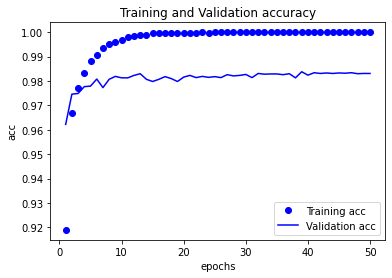

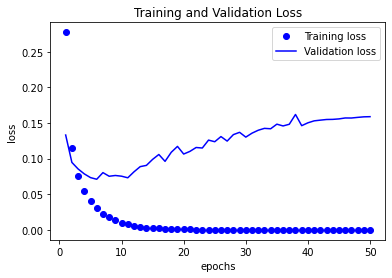

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc  = history.history['accuracy']
val_acc  = history.history['val_accuracy']

epochs = np.array(range(1,51))


plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title("Training and Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("acc")
plt.legend()
plt.show()
plt.close()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title("Training and Validation Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()
plt.close()


# Execise

1) play with the model:  change layer size, increse number of layers

2) play with the optimizer: for example change it to Adam

3) change the size of train and validation 